In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Tons de Verde
VERDE1, VERDE2, VERDE3, VERDE4, VERDE5 = '#1f3324', '#3d6647','#5c996b','#7acc8f','#99ffb2'
# Tons de Cinza
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#181819','#313132','#636364','#afafaf','#f8f8fa'
# Tons Complementares
COMPLEMENTAR1, COMPLEMENTAR2, COMPLEMENTAR3, COMPLEMENTAR4, COMPLEMENTAR5 = '#ff7373','#965A87','#107DAC','#EBA0AC','#f09537'

In [4]:
# Dados
data = {
	'DATA': [
		'2024-05-08', '2024-05-09', '2024-05-10', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-20', '2024-05-21',
		'2024-05-22', '2024-05-23', '2024-05-24', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04',
		'2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17', '2024-06-18',
		'2024-06-19', '2024-06-20', '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01', '2024-07-02',
		'2024-07-03', '2024-07-04', '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
		'2024-07-17', '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
		'2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12', '2024-08-13',
		'2024-08-14', '2024-08-15', '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
		'2024-08-28', '2024-08-29', '2024-08-30', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09', '2024-09-10',
		'2024-09-11', '2024-09-12', '2024-09-13', '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-23', '2024-09-24', '2024-09-25',
		'2024-09-26', '2024-09-27', '2024-09-30'
	],
	'BATATA': [6.00 ,6.80 ,6.80 ,6.00 ,6.80 ,6.80 ,6.80 ,6.80 ,6.40 ,6.40 ,6.40 ,6.40 ,6.40 ,6.40 ,6.40 ,6.40 ,6.40 ,6.80 ,6.80 ,6.80 ,6.80 ,6.80 ,6.80 ,6.80 ,7.20 ,7.20 ,7.20 ,6.80 ,6.80 ,7.20 ,6.80 ,7.00 ,7.00 ,6.80 ,6.40 ,6.40 ,6.40 ,6.40 ,6.80 ,6.40 ,6.40 ,6.40 ,6.40 ,6.80 ,6.80 ,6.80 ,7.20 ,7.20 ,6.80 ,6.60 ,6.60 ,6.40 ,6.40 ,5.20 ,4.80 ,4.80 ,4.80 ,4.80 ,4.60 ,4.60 ,4.40 ,4.40 ,4.40 ,4.40 ,4.40 ,4.40 ,4.40 ,4.40 ,5.20 ,4.40 ,4.40 ,4.40 ,4.40 ,4.60 ,4.40 ,4.00 ,4.40 ,4.40 ,4.60 ,4.80 ,4.80 ,4.80 ,4.80 ,5.20 ,5.20 ,5.20 ,5.20 ,5.20 ,4.80 ,4.60 ,4.40 ,4.20 ,4.20 ,4.00 ,4.00 ,4.00 ,4.20 ,4.40 ,4.80 ,4.80 ,4.40 ,4.40 ,4.40
	],
	'TOMATE': [
		7.22 ,8.89 ,7.50 ,7.22 ,7.50 ,7.50 ,7.50 ,6.50 ,7.50 ,7.50 ,7.50 ,7.50 ,6.00 ,6.00 ,7.00 ,7.00 ,8.00 ,8.00 ,8.50 ,8.50 ,8.50 ,8.50 ,8.50 ,9.00 ,8.50 ,9.00 ,8.50 ,8.50 ,7.00 ,6.00 ,7.00 ,5.00 ,4.75 ,4.75 ,4.75 ,4.75 ,4.75 ,4.25 ,4.25 ,5.00 ,5.00 ,5.00 ,5.00 ,4.44 ,4.21 ,4.21 ,4.17 ,4.17 ,4.44 ,4.17 ,4.17 ,3.89 ,3.89 ,3.33 ,3.33 ,3.89 ,3.00 ,3.00 ,4.72 ,5.00 ,5.00 ,5.00 ,5.00 ,4.44 ,3.90 ,3.89 ,3.89 ,3.89 ,3.33 ,3.33 ,3.33 ,3.33 ,3.33 ,3.33 ,3.33 ,3.05 ,3.05 ,3.05 ,3.61 ,3.89 ,3.89 ,3.00 ,3.00 ,3.61 ,3.33 ,3.33 ,3.33 ,3.33 ,5.00 ,5.00 ,5.00 ,4.15 ,4.15 ,3.89 ,3.89 ,3.89 ,3.89 ,3.33 ,3.89 ,3.89 ,3.89 ,3.89 ,4.00
	],
	'CEBOLA': [
		5.00 ,5.00 ,6.00 ,5.00 ,6.00 ,6.00 ,6.00 ,6.00 ,6.25 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.50 ,6.00 ,5.50 ,5.75 ,5.00 ,5.00 ,5.00 ,5.50 ,5.50 ,5.00 ,5.00 ,5.00 ,5.50 ,5.50 ,5.25 ,5.50 ,6.00 ,6.00 ,6.00 ,6.00 ,6.00 ,5.50 ,5.50 ,5.50 ,5.50 ,5.50 ,5.75 ,5.75 ,5.75 ,4.75 ,4.75 ,4.50 ,4.75 ,4.75 ,4.75 ,4.75 ,4.75 ,5.00 ,4.50 ,4.50 ,4.50 ,5.00 ,4.00 ,4.00 ,4.00 ,4.00 ,4.00 ,4.00 ,3.50 ,3.75 ,3.75 ,3.50 ,3.00 ,3.00 ,3.50 ,3.50 ,3.50 ,3.50 ,3.50 ,3.50 ,3.50 ,3.50 ,3.50 ,3.25 ,3.25 ,3.25 ,3.00 ,3.00 ,3.00 ,3.00 ,3.00 ,2.75 ,2.75 ,2.75 ,2.75 ,2.50 ,2.50 ,2.50 ,2.50 ,2.50 ,2.50 ,
	]
}

# Criação do DataFrame
df = pd.DataFrame(data)
df['DATA'] = df['DATA'].astype('datetime64[ns]')

# Exibindo o DataFrame
df

,DATA,BATATA,TOMATE,CEBOLA
0,2024-05-08,6.0,7.22,5.0
1,2024-05-09,6.8,8.89,5.0
2,2024-05-10,6.8,7.50,6.0
3,2024-05-13,6.0,7.22,5.0
4,2024-05-14,6.8,7.50,6.0
...,...,...,...,...
98,2024-09-24,4.8,3.89,2.5
99,2024-09-25,4.8,3.89,2.5
100,2024-09-26,4.4,3.89,2.5
101,2024-09-27,4.4,3.89,2.5


In [6]:
data = { 'BATATA': [6.51, 6.82, 6.00, 4.51, 4.58], 'TOMATE': [7.32, 6.95, 4.23, 3.63, 3.93], 'CEBOLA': [6.10, 5.63, 5.30, 3.77, 2.89] }
index = ['MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO']

df = pd.DataFrame(data, index=index)
df = df.reset_index()
df

,index,BATATA,TOMATE,CEBOLA
0,MAIO,6.51,7.32,6.10
1,JUNHO,6.82,6.95,5.63
2,JULHO,6.00,4.23,5.30
3,AGOSTO,4.51,3.63,3.77
4,SETEMBRO,4.58,3.93,2.89


### Funções para a Criação do Gráfico

### Tomate

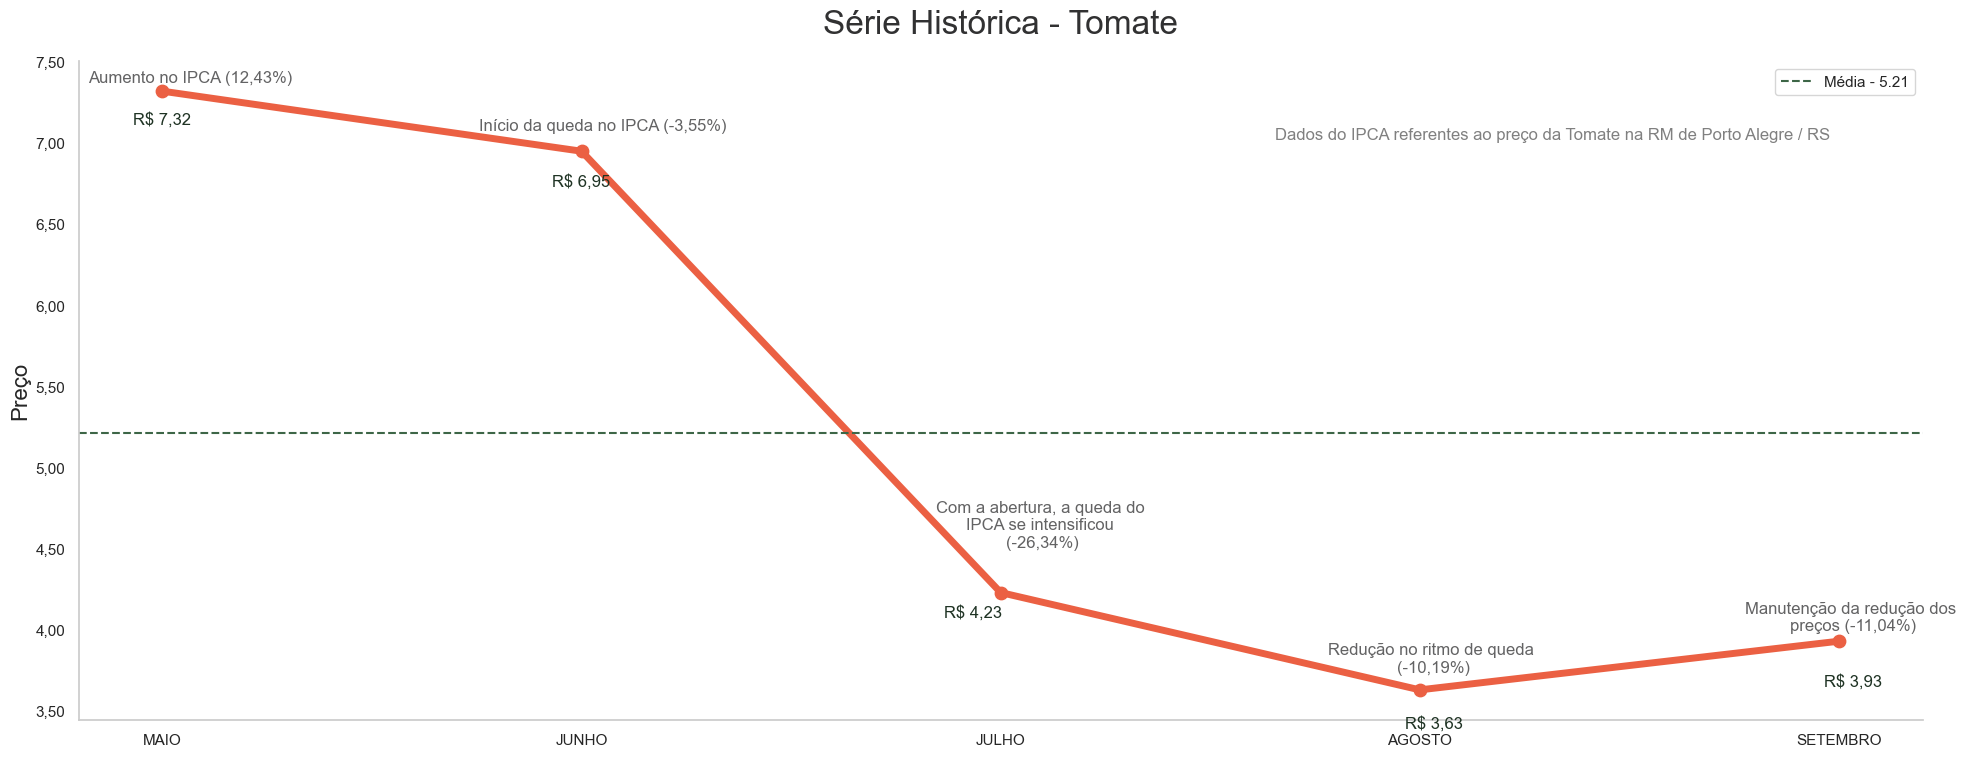

In [132]:
# top5 = df.nlargest(5, 'TOMATE')
# bottom5 = df.nsmallest(5, 'TOMATE')

# # Unindo os 5 maiores e 5 menores
# extremos = pd.concat([top5, bottom5])

cor_da_media=VERDE2
def format_decimal(x, pos):
	return f'{x:.2f}'.replace('.', ',')

fig, axs = plt.subplots(figsize=(20, 8))
sns.set_theme(style='whitegrid')

axs = sns.lineplot(data=df, x='index', y='TOMATE', ax=axs, color='#eb6043', linewidth=5)
axs.scatter(df['index'], df['TOMATE'], color='#eb6043', label='_nolegend_', s=80)


axs.set_title('Série Histórica - Tomate', fontsize=24, pad=20, color=CINZA2)
axs.set_ylabel("Preço", fontsize=16)
axs.yaxis.set_major_formatter(ticker.FuncFormatter(format_decimal))

axs.set_xlabel("")
axs.grid(False)
axs.axhline(y=df['TOMATE'].mean(), color=cor_da_media, linestyle='--', label=f"Média - {round(df['TOMATE'].mean(), 2)}")

ipca = { 'meses': ['MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO'], 'ipca_poa': ['12,43', '-3,55', '-26,34', '-10,19', '-11,04'] }

# Textos
axs.annotate('Aumento no IPCA (12,43%)',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(20, -15), ha='center', color=CINZA3 )
axs.annotate('Início da queda no IPCA (-3,55%)',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(15, -50), ha='center', color=CINZA3 )
axs.annotate('Com a abertura, a queda do \nIPCA se intensificou \n(-26,34%)',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(30, -350), ha='center', color=CINZA3 )
axs.annotate('Redução no ritmo de queda \n(-10,19%)',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -440), ha='center', color=CINZA3 )
axs.annotate('Manutenção da redução dos \npreços (-11,04%)',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -410), ha='center', color=CINZA3 )

# Pontos
axs.annotate('R$ 7,32',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -45), ha='center', color=VERDE1 )
axs.annotate('R$ 6,95',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -90), ha='center', color=VERDE1 )
axs.annotate('R$ 4,23',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(-20, -400), ha='center', color=VERDE1 )
axs.annotate('R$ 3,63',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -480), ha='center', color=VERDE1 )
axs.annotate('R$ 3,93',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -450), ha='center', color=VERDE1 )

axs.text(
	0.95, 0.90, "Dados do IPCA referentes ao preço da Tomate na RM de Porto Alegre / RS", transform=axs.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color="grey")

axs.legend(loc='best')
sns.despine()
fig.tight_layout()

plt.show()


### Batata

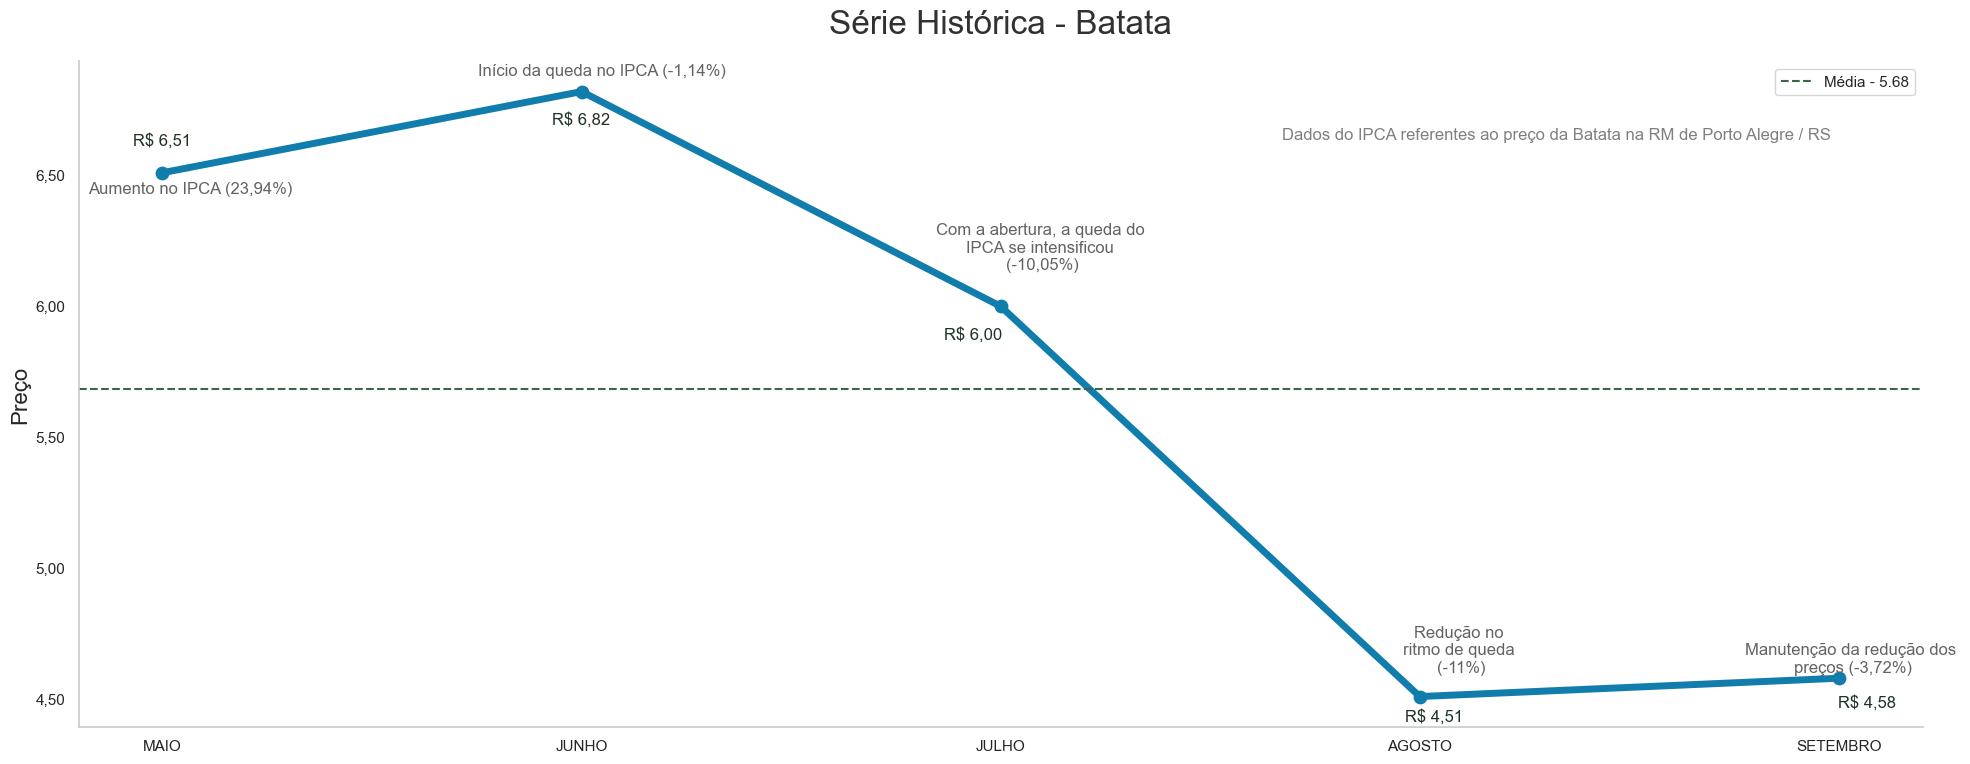

In [131]:
# top5 = df.nlargest(5, 'TOMATE')
# bottom5 = df.nsmallest(5, 'TOMATE')

# # Unindo os 5 maiores e 5 menores
# extremos = pd.concat([top5, bottom5])

cor_da_media=VERDE2
def format_decimal(x, pos):
	return f'{x:.2f}'.replace('.', ',')

fig, axs = plt.subplots(figsize=(20, 8))
sns.set_theme(style='whitegrid')

axs = sns.lineplot(data=df, x='index', y='BATATA', ax=axs, color=COMPLEMENTAR3, linewidth=5)
axs.scatter(df['index'], df['BATATA'], color=COMPLEMENTAR3, label='_nolegend_', s=80)


axs.set_title('Série Histórica - Batata', fontsize=24, pad=20, color=CINZA2)
axs.set_ylabel("Preço", fontsize=16)
axs.yaxis.set_major_formatter(ticker.FuncFormatter(format_decimal))

axs.set_xlabel("")
axs.grid(False)
axs.axhline(y=df['BATATA'].mean(), color=cor_da_media, linestyle='--', label=f"Média - {round(df['BATATA'].mean(), 2)}")


# Textos
axs.annotate('Aumento no IPCA (23,94%)',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(20, -95), ha='center', color=CINZA3 )
axs.annotate('Início da queda no IPCA (-1,14%)',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(15, -10), ha='center', color=CINZA3 )
axs.annotate('Com a abertura, a queda do \nIPCA se intensificou \n(-10,05%)',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(30, -150), ha='center', color=CINZA3 )
axs.annotate('Redução no \nritmo de queda \n(-11%)',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(30, -440), ha='center', color=CINZA3 )
axs.annotate('Manutenção da redução dos \npreços (-3,72%)',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -440), ha='center', color=CINZA3 )

# Pontos
axs.annotate('R$ 6,51',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -60), ha='center', color=VERDE1 )
axs.annotate('R$ 6,82',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -45), ha='center', color=VERDE1 )
axs.annotate('R$ 6,00',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(-20, -200), ha='center', color=VERDE1 )
axs.annotate('R$ 4,51',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -475), ha='center', color=VERDE1 )
axs.annotate('R$ 4,58',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(20, -465), ha='center', color=VERDE1 )

axs.text(
	0.95, 0.90, "Dados do IPCA referentes ao preço da Batata na RM de Porto Alegre / RS", transform=axs.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color="grey")

axs.legend(loc='best')
sns.despine()
fig.tight_layout()

plt.show()


### Cebola

AttributeError: FancyBboxPatch.set() got an unexpected keyword argument 'padding'

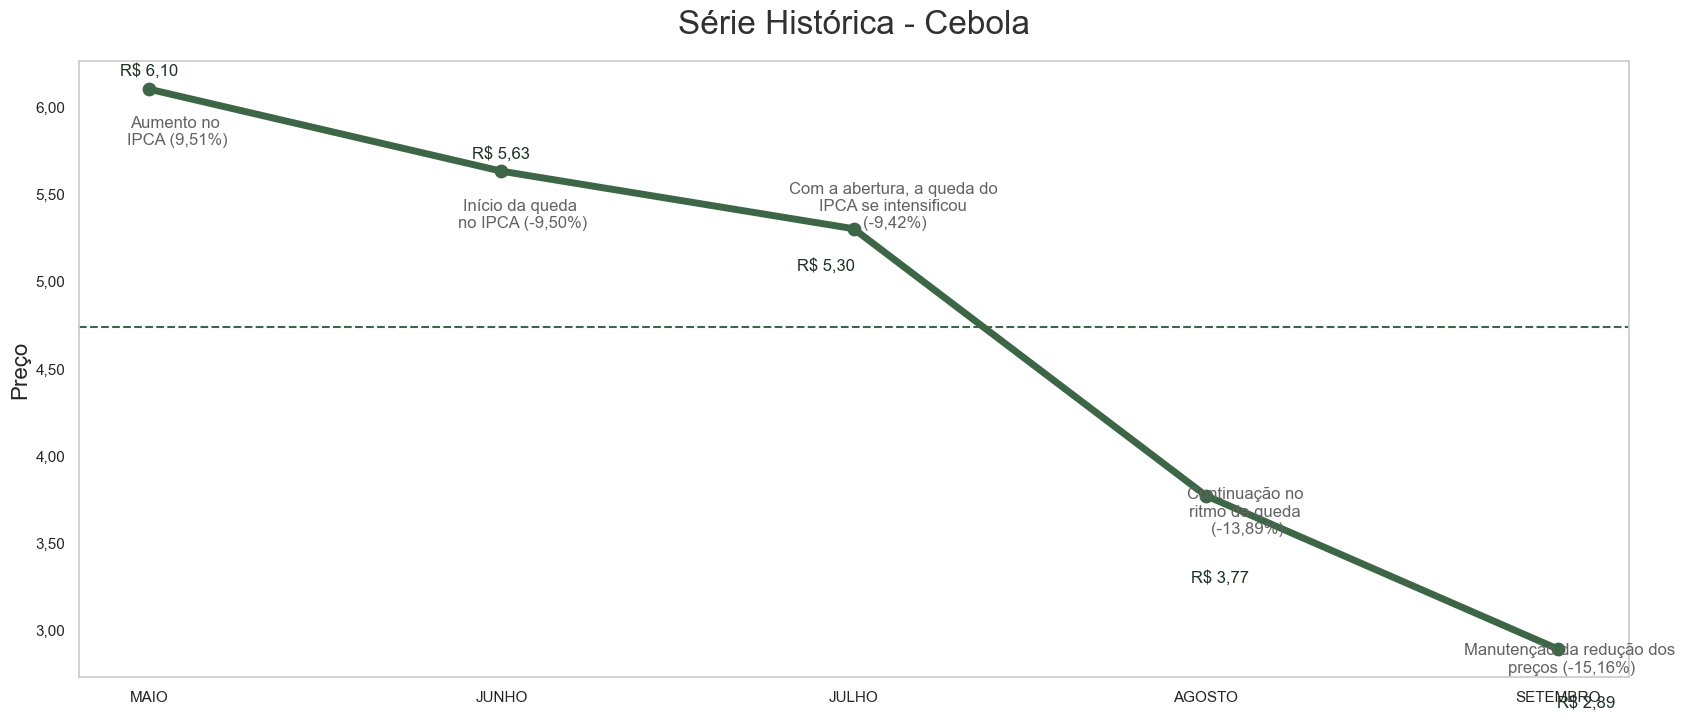

In [138]:
cor_da_media=VERDE2
def format_decimal(x, pos):
	return f'{x:.2f}'.replace('.', ',')

fig, axs = plt.subplots(figsize=(20, 8))
sns.set_theme(style='whitegrid')

axs = sns.lineplot(data=df, x='index', y='CEBOLA', ax=axs, color=VERDE2, linewidth=5)
axs.scatter(df['index'], df['CEBOLA'], color=VERDE2, label='_nolegend_', s=80)


axs.set_title('Série Histórica - Cebola', fontsize=24, pad=20, color=CINZA2)
axs.set_ylabel("Preço", fontsize=16)
axs.yaxis.set_major_formatter(ticker.FuncFormatter(format_decimal))

axs.set_xlabel("")
axs.grid(False)
axs.axhline(y=df['CEBOLA'].mean(), color=cor_da_media, linestyle='--', label=f"Média - {round(df['CEBOLA'].mean(), 2)}")


# Textos
axs.annotate('Aumento no \nIPCA (9,51%)',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(20, -60), ha='center', color=CINZA3 )
axs.annotate('Início da queda \nno IPCA (-9,50%)',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(15, -120), ha='center', color=CINZA3 )
axs.annotate('Com a abertura, a queda do \nIPCA se intensificou \n(-9,42%)',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(30, -120), ha='center', color=CINZA3 )
axs.annotate('Continuação no \nritmo de queda \n(-13,89%)',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(30, -340), ha='center', color=CINZA3 )
axs.annotate('Manutenção da redução dos \npreços (-15,16%)',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -440), ha='center', color=CINZA3 )

# Pontos
axs.annotate('R$ 6,10',('MAIO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -10), ha='center', color=VERDE1 )
axs.annotate('R$ 5,63',('JUNHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(0, -70), ha='center', color=VERDE1 )
axs.annotate('R$ 5,30',('JULHO', axs.get_ylim()[1]), textcoords="offset points", xytext=(-20, -150), ha='center', color=VERDE1 )
axs.annotate('R$ 3,77',('AGOSTO', axs.get_ylim()[1]), textcoords="offset points", xytext=(10, -375), ha='center', color=VERDE1 )
axs.annotate('R$ 2,89',('SETEMBRO', axs.get_ylim()[1]), textcoords="offset points", xytext=(20, -465), ha='center', color=VERDE1 )



axs.text(
	0.95, 0.90, "Dados do IPCA referentes ao preço da Cebola na RM de Porto Alegre / RS", transform=axs.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color="grey")

axs.legend(loc='best')
sns.despine()
fig.tight_layout()

plt.show()


## Gráfico de Inclinação

In [3]:
data = { 'BATATA': [6.51, 6.82, 6.00, 4.51, 4.58], 'TOMATE': [7.32, 6.95, 4.23, 3.63, 3.93], 'CEBOLA': [6.10, 5.63, 5.30, 3.77, 2.89] }
index = ['MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO']

df = pd.DataFrame(data, index=index)
df = df.reset_index()
df

,index,BATATA,TOMATE,CEBOLA
0,MAIO,6.51,7.32,6.10
1,JUNHO,6.82,6.95,5.63
2,JULHO,6.00,4.23,5.30
3,AGOSTO,4.51,3.63,3.77
4,SETEMBRO,4.58,3.93,2.89


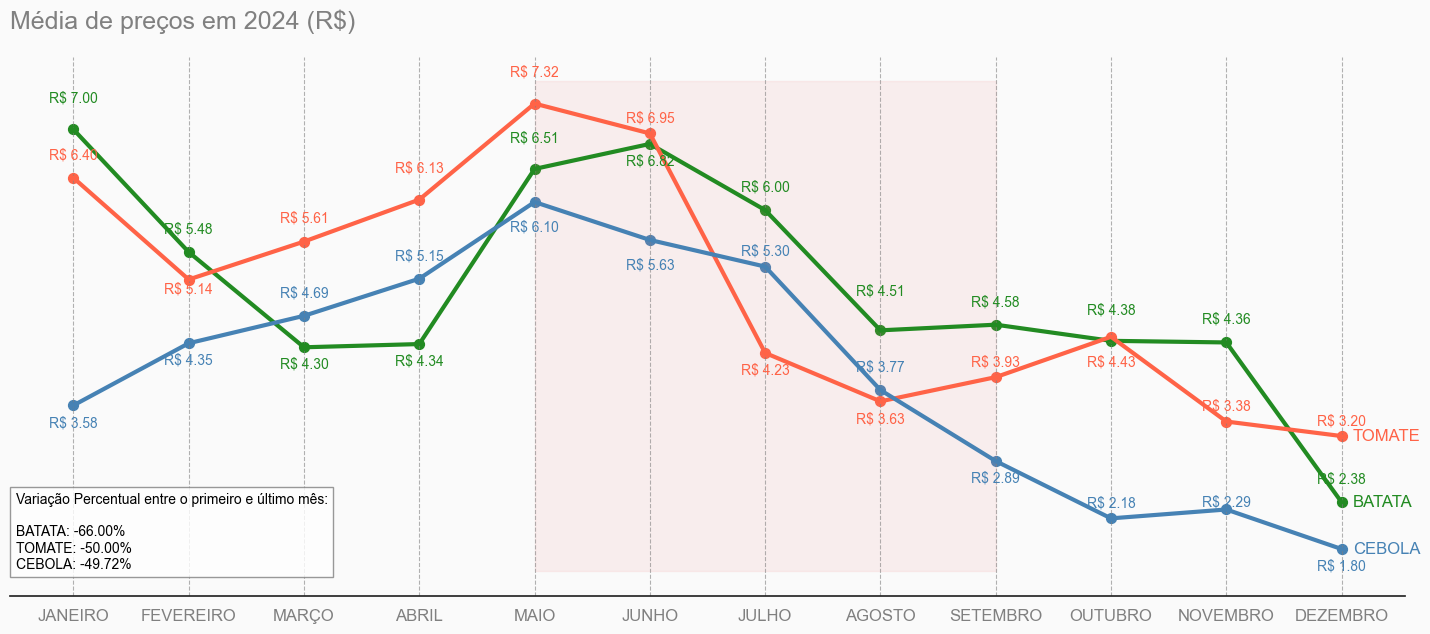

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurando o tema do Seaborn
sns.set_theme(style='white')

# Dados fornecidos
data = {'BATATA': [7.00, 5.48, 4.3, 4.34, 6.51, 6.82, 6.00, 4.51, 4.58, 4.38, 4.36, 2.38],
		'TOMATE': [6.4, 5.14, 5.61, 6.13, 7.32, 6.95, 4.23, 3.63, 3.93, 4.43, 3.38, 3.20],
		'CEBOLA': [3.58, 4.35, 4.69, 5.15, 6.10, 5.63, 5.30, 3.77, 2.89, 2.18, 2.29, 1.8]}
index = ['JANEIRO','FEVEREIRO','MARÇO','ABRIL','MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO','OUTUBRO','NOVEMBRO','DEZEMBRO']

# Criando o DataFrame
df = pd.DataFrame(data, index=index).reset_index()
df.rename(columns={'index': 'MÊS'}, inplace=True)

# Convertendo os meses para valores numéricos para o eixo X
df['MÊS_NUM'] = range(len(df))

# Cores para o gráfico
VERDE3 = "#228B22"
VERMELHO2 = "#FF6347"
AZUL3 = "#4682B4"
cores = [VERDE3, VERMELHO2, AZUL3]

# Calculando a variação percentual entre o primeiro e o último ponto para cada produto
variacao_percentual = {produto: ((valores[-1] - valores[0]) / valores[0]) * 100 for produto, valores in data.items()}
texto_variacao_percentual = "\n".join([f"{produto}: {variacao:.2f}%" for produto, variacao in variacao_percentual.items()])

# Configurando a área do gráfico
fig, ax1 = plt.subplots(figsize=(18, 7), facecolor="#FAFAFA")
ax1.set_facecolor("#FAFAFA")

# Adicionando linhas verticais tracejadas para os meses
for x in df['MÊS_NUM']:
	ax1.axvline(x=x, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)

# Ajustes verticais para cada linha, agora com 12 elementos
ajustes_batata = [0.3, 0.2, -0.3, -0.3, 0.3, -0.3, 0.2, 0.4, 0.2, 0.3, 0.2, 0.2]
ajustes_tomate = [0.2, -0.2, 0.2, 0.3, 0.3, 0.1, -0.3, -0.3, 0.1, -0.4, 0.1, 0.1]
ajustes_cebola = [-0.3, -0.3, 0.2, 0.2, -0.4, -0.4, 0.1, 0.2, -0.3, 0.1, 0.0, -0.3]
ajustes = [ajustes_batata, ajustes_tomate, ajustes_cebola]

# Gerando o gráfico de inclinação com bolinhas e valores
for i, coluna in enumerate(data.keys()):
	# Adicionando a linha de inclinação
	ax1.plot(df['MÊS_NUM'], df[coluna], color=cores[i], lw=3)

	# Adicionando as bolinhas para cada ponto
	ax1.scatter(df['MÊS_NUM'], df[coluna], color=cores[i], s=50)

	# Adicionando os valores nas marcações com ajustes específicos
	for j, (x, y) in enumerate(zip(df['MÊS_NUM'], df[coluna])):
		ax1.text(x, y + ajustes[i][j], f"R$ {y:.2f}", fontsize=10, color=cores[i], ha='center', va='bottom')

	# Anotação personalizada ao lado de cada linha para servir de legenda
	ax1.text(df['MÊS_NUM'].iloc[-1] + 0.1, df[coluna].iloc[-1], coluna, color=cores[i],
			 fontsize=12, va='center', ha='left')

# Personalizando o gráfico
ax1.set_title('Média de preços em 2024 (R$)', fontsize=18, color="gray", loc='left', pad=20)
ax1.set_xticks(df['MÊS_NUM'])
ax1.set_xticklabels(df['MÊS'], fontsize=12, color="gray")
ax1.tick_params(axis='y', left=False, labelleft=False)  # Excluindo o eixo Y esquerdo

ax1.spines[['top', 'left', 'right']].set_visible(False)

# Aplicando o despine para mostrar apenas a borda inferior
sns.despine(ax=ax1, bottom=False, left=True, right=True, top=True)

# Adicionando o texto com a diferença percentual no canto inferior esquerdo
ax1.text(-0.5, 2.5, f"Variação Percentual entre o primeiro e último mês:\n\n{texto_variacao_percentual}",
		 fontsize=10, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Obter os limites do eixo Y
y_min, y_max = ax1.get_ylim()

# Preenchendo entre os meses MAIO e SETEMBRO com base nos limites do eixo Y
x_fill = df[(df['MÊS'] >= 'MAIO') & (df['MÊS'] <= 'SETEMBRO')]['MÊS_NUM']
ax1.fill_between(x=[4, 8], y1=y_min, y2=y_max, color='lightcoral', alpha=0.1)

# Exibindo o gráfico
plt.show()
